In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import seaborn as sns

In [9]:
# loads all parts of the clean canadiens data sets and turns them into 1 dataframe 
df1 = pd.read_csv('./data/canada_all_df_pt1.csv')
df2 = pd.read_csv('./data/canada_all_df_pt2.csv')
df3 = pd.read_csv('./data/canada_all_df_pt3.csv')
df4 = pd.read_csv('./data/canada_all_df_pt4.csv')
df5 = pd.read_csv('./data/canada_all_df_pt5.csv')
df6 = pd.read_csv('./data/canada_all_df_pt6.csv')
df7 = pd.read_csv('./data/canada_all_df_pt7.csv')
df8 = pd.read_csv('./data/canada_all_df_pt8.csv')
df9 = pd.read_csv('./data/canada_all_df_pt9.csv')
df10 = pd.read_csv('./data/canada_all_df_pt10.csv')
df11 = pd.read_csv('./data/canada_all_df_pt11.csv')
df12 = pd.read_csv('./data/canada_all_df_pt12.csv')
df13 = pd.read_csv('./data/canada_all_df_pt13.csv')
df14 = pd.read_csv('./data/canada_all_df_pt14.csv')
df15 = pd.read_csv('./data/canada_all_df_pt15.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15])

In [11]:
df

Stn_Name     Lat     Long Prov    Tm  DwTm    Tx  DwTx  \
0                 ABITIBI POST  48.717  -79.367   QC -19.6   0.0   1.7   0.0   
1                  AGASSIZ CDA  49.243 -121.760   BC   0.3   0.0   8.9   0.0   
2         ALBERNI BEAVER CREEK  49.367 -124.933   BC   0.5   0.0   9.4   0.0   
3                    ALERT BAY  50.583 -126.933   BC   3.2   0.0   8.9   0.0   
4                         ALIX  52.383 -113.167   AB -15.4   0.0   6.7   0.0   
...                        ...     ...      ...  ...   ...   ...   ...   ...   
121995                   YOHIN  61.242 -123.742   NT -16.1  16.0  12.5  15.0   
121996               YOHO PARK  51.443 -116.345   BC -14.6   0.0  -1.8   0.0   
121997                 YORKTON  51.265 -102.464   SK -13.3   0.0   4.2   0.0   
121998                 YORKTON  51.265 -102.462   SK -13.7   3.0   4.1   3.0   
121999  ZEBALLOS MURAUDE CREEK  50.053 -126.779   BC   3.4   0.0  16.5   0.0   

          Tn  DwTn          S       DwS         P  DwP      Pd     HDD  CDD  \
0      -38.3   0.0  22.900000  0.000000   22.9000  0.0   5.000  1164.5  0.0   
1      -18.3   0.0  82.600000  0.000000  256.5000  0.0  20.000   549.4  0.0   
2      -16.7   0.0  63.400000  0.000000  136.1000  0.0  13.000   542.1  0.0   
3      -11.1   0.0  40.600000  0.000000  186.0000  0.0  21.000   460.1  0.0   
4      -47.2   0.0  40.200000  0.000000   42.0000  0.0   9.000  1036.2  0.0   
...      ...   ...        ...       ...       ...  ...     ...     ...  ...   
121995 -39.5   9.0  10.256098  0.560976   10.1575  0.1   3.525   510.9  0.0   
121996 -34.4   0.0   0.000000  0.000000   10.8000  0.0   4.000  1010.2  0.0   
121997 -35.9   0.0   9.900000  0.000000    8.2000  0.0   3.000   969.7  0.0   
121998 -35.5   3.0   9.900000  0.000000    0.0000  3.0   0.000   887.3  0.0   
121999  -5.0   0.0   0.000000  0.000000  105.1000  0.0  10.000   451.8  0.0   

        Clim_ID  Year  Month  
0       7090050  1917      1  
1       1100120  1917      1  
2       1030180  1917      1  
3       1020270  1917      1  
4       3020120  1917      1  
...         ...   ...    ...  
121995  2204300  2017     12  
121996  11790J1  2017     12  
121997  4019073  2017     12  
121998  4019075  2017     12  
121999  1039035  2017     12  

[1522001 rows x 20 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522001 entries, 0 to 121999
Data columns (total 20 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Stn_Name  1522001 non-null  object 
 1   Lat       1522001 non-null  float64
 2   Long      1522001 non-null  float64
 3   Prov      1522001 non-null  object 
 4   Tm        1522001 non-null  float64
 5   DwTm      1522001 non-null  float64
 6   Tx        1522001 non-null  float64
 7   DwTx      1522001 non-null  float64
 8   Tn        1522001 non-null  float64
 9   DwTn      1522001 non-null  float64
 10  S         1522001 non-null  float64
 11  DwS       1522001 non-null  float64
 12  P         1522001 non-null  float64
 13  DwP       1522001 non-null  float64
 14  Pd        1522001 non-null  float64
 15  HDD       1522001 non-null  float64
 16  CDD       1522001 non-null  float64
 17  Clim_ID   1522001 non-null  object 
 18  Year      1522001 non-null  int64  
 19  Month     1522001 non-

In [13]:
df.describe()

Lat          Long            Tm          DwTm            Tx  \
count  1.522001e+06  1.522001e+06  1.522001e+06  1.522001e+06  1.522001e+06   
mean   5.027418e+01 -9.531779e+01  3.841620e+00  1.003819e+00  1.853496e+01   
std    5.376809e+00  2.305796e+01  1.140233e+01  3.532910e+00  1.093530e+01   
min    0.000000e+00 -1.410000e+02 -5.000000e+01  0.000000e+00 -5.000000e+01   
25%    4.648300e+01 -1.159500e+02 -4.300000e+00  0.000000e+00  9.800000e+00   
50%    4.947700e+01 -9.933300e+01  5.600000e+00  0.000000e+00  2.000000e+01   
75%    5.220000e+01 -7.388300e+01  1.330000e+01  0.000000e+00  2.800000e+01   
max    8.251800e+01  8.100000e+00  2.790000e+01  3.000000e+01  5.000000e+01   

               DwTx            Tn          DwTn             S           DwS  \
count  1.522001e+06  1.522001e+06  1.522001e+06  1.522001e+06  1.522001e+06   
mean   8.310376e-01 -1.081778e+01  8.010007e-01  1.487211e+01  6.747549e-01   
std    3.160070e+00  1.430791e+01  3.118503e+00  2.546273e+01  3.341582e+00   
min    0.000000e+00 -6.300000e+01  0.000000e+00 -3.000000e+00  0.000000e+00   
25%    0.000000e+00 -2.200000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00 -6.500000e+00  0.000000e+00  2.000000e+00  0.000000e+00   
75%    0.000000e+00  6.000000e-01  0.000000e+00  2.141200e+01  0.000000e+00   
max    3.000000e+01  2.230000e+01  3.000000e+01  7.259000e+02  3.000000e+01   

                  P           DwP            Pd           HDD           CDD  \
count  1.522001e+06  1.522001e+06  1.522001e+06  1.522001e+06  1.522001e+06   
mean   6.716667e+01  7.458784e-01  8.694648e+00  4.251084e+02  7.945689e+00   
std    6.336950e+01  3.158148e+00  4.717999e+00  3.270979e+02  1.822145e+01   
min   -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.480000e+01  0.000000e+00  5.000000e+00  1.405892e+02  0.000000e+00   
50%    5.360000e+01  0.000000e+00  8.000000e+00  3.635000e+02  0.000000e+00   
75%    9.070000e+01  0.000000e+00  1.200000e+01  6.568000e+02  5.212121e+00   
max    9.979000e+02  3.000000e+01  3.100000e+01  2.089000e+03  2.213000e+02   

               Year         Month  
count  1.522001e+06  1.522001e+06  
mean   1.977267e+03  6.518661e+00  
std    2.454704e+01  3.409700e+00  
min    1.917000e+03  1.000000e+00  
25%    1.962000e+03  4.000000e+00  
50%    1.980000e+03  7.000000e+00  
75%    1.997000e+03  9.000000e+00  
max    2.017000e+03  1.200000e+01

In [17]:
df['decade'] = df['Year']//10 *10


df['decade'] = df['decade'].astype(str)

In [18]:
X= df.drop(columns= ['Stn_Name', 'Prov', 'Clim_ID', 'decade', 'Year'])
y = df['decade']

X_train, X_test,y_train,y_test = train_test_split(X,y, stratify=y)

In [19]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [20]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_sc,y_train)
logreg.score(X_train_sc,y_train), logreg.score(X_test_sc,y_test)

(0.184586946999562, 0.18348966231363387)

In [21]:
# makes a new column that called decade. The value reflects how many decades the after 1910 the data was recorded  

dec ={'1910':0, '1920':1, '1930':2, '1940':3, '1950':4, '1960':5, '1970':6, '1980':7,
       '1990':8, '2000':9, '2010':10}

df['decade']=   df['decade'].map(dec)

In [9]:
df.groupby('decade')['Tx'].mean()

decade
0     19.016950
1     19.087552
2     19.520774
3     19.063212
4     18.315422
5     18.358791
6     18.417478
7     18.742161
8     18.552584
9     18.259596
10    17.957697
Name: Tx, dtype: float64

In [6]:
df.groupby('decade')['Tm'].mean()

decade
0     3.766634
1     3.972580
2     4.070306
3     3.891761
4     3.497647
5     3.539362
6     3.649041
7     4.089190
8     4.117882
9     3.738168
10    3.916628
Name: Tm, dtype: float64

In [7]:
df.groupby('decade')['Tn'].mean()

decade
0    -12.121172
1    -11.576949
2    -11.468027
3    -11.433952
4    -11.454833
5    -11.130557
6    -11.145894
7    -10.665134
8    -10.266586
9    -10.339994
10    -9.886566
Name: Tn, dtype: float64

In [46]:
df.groupby('decade')['S'].mean()

decade
1910    13.748405
1920    13.469819
1930    14.066436
1940    14.508848
1950    15.585089
1960    15.506155
1970    16.878345
1980    14.259032
1990    14.846895
2000    22.473846
Name: S, dtype: float64

In [47]:
df.groupby('decade')['P'].mean()

decade
1910    59.860347
1920    59.028634
1930    61.406025
1940    63.011783
1950    65.674160
1960    66.828072
1970    70.934512
1980    71.716461
1990    71.713330
2000    67.397150
Name: P, dtype: float64

In [48]:
df.groupby('decade')['HDD'].mean()

decade
1910    434.350394
1920    428.532350
1930    432.671475
1940    435.491772
1950    439.348721
1960    436.675629
1970    434.447226
1980    419.121328
1990    413.574832
2000    612.564363
Name: HDD, dtype: float64

In [49]:
df.groupby('decade')['CDD'].mean()

decade
1910    9.293712
1920    9.031074
1930    8.956898
1940    8.556478
1950    8.396830
1960    8.007322
1970    7.911380
1980    7.718762
1990    7.344232
2000    0.029894
Name: CDD, dtype: float64

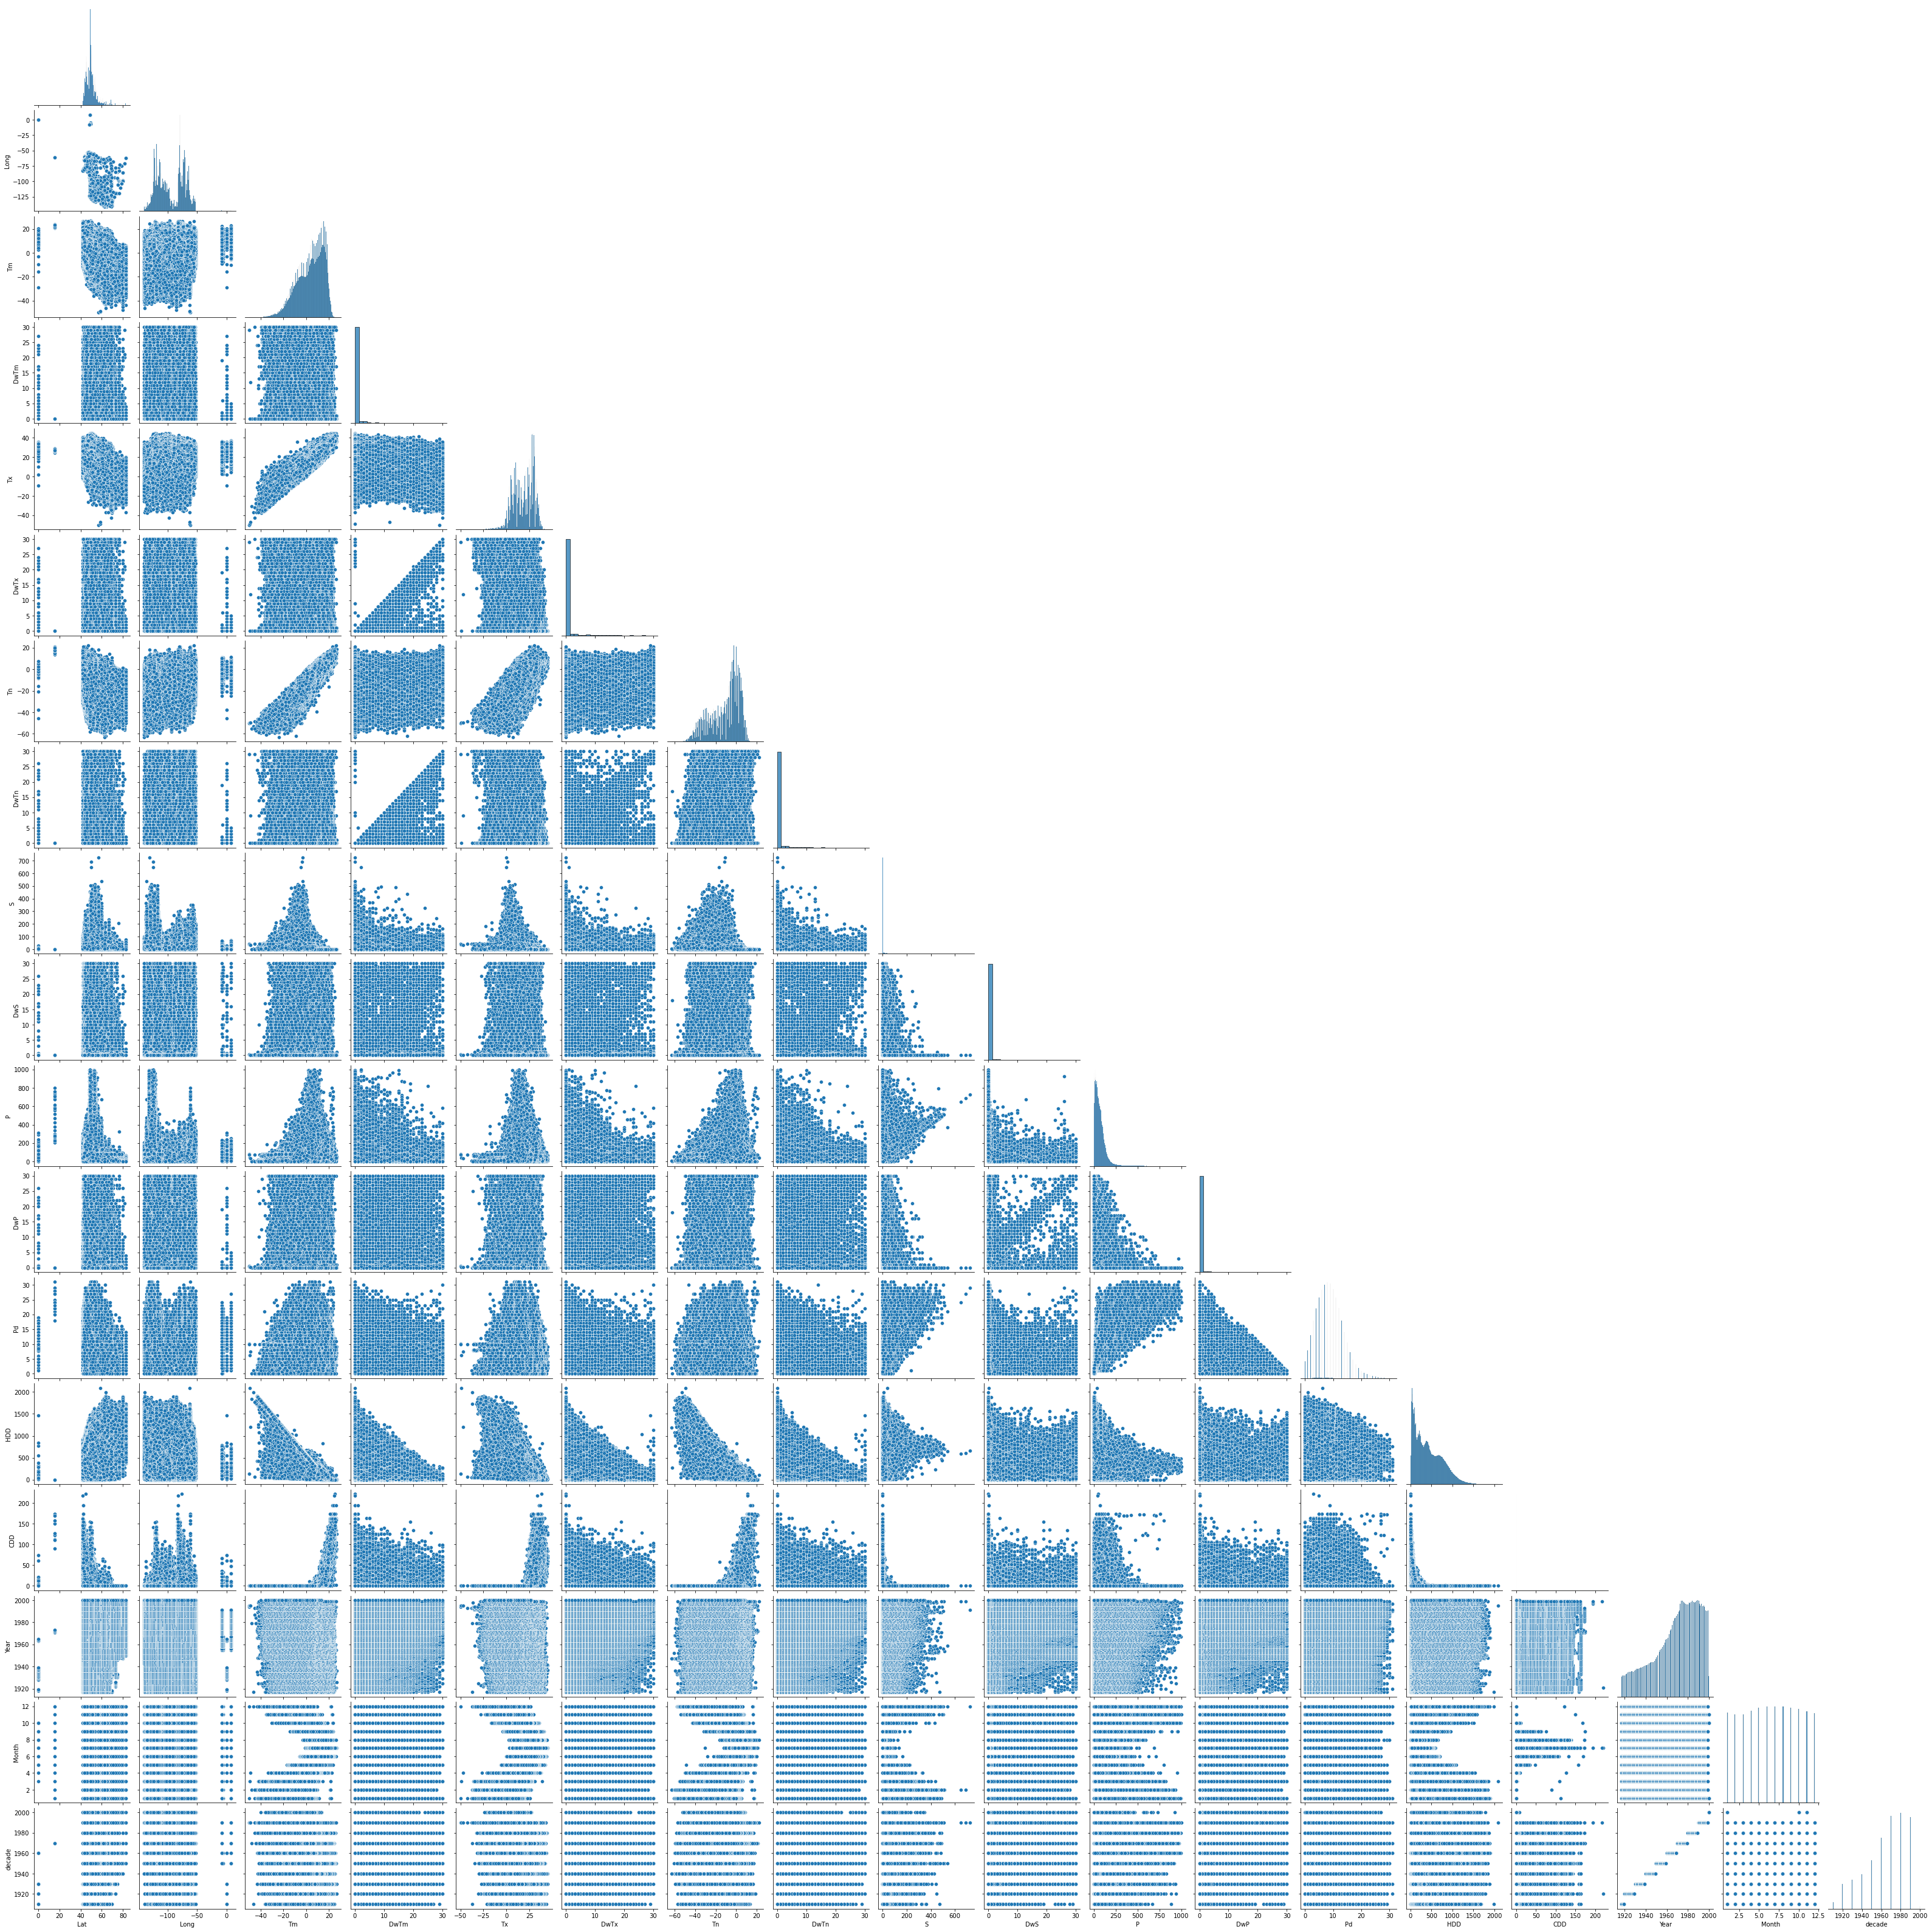

In [55]:
sns.pairplot(df,corner=True)

<AxesSubplot:xlabel='Year', ylabel='Density'>

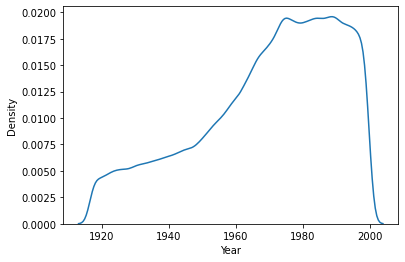

In [57]:
sns.kdeplot(df['Year'])

In [23]:
df['decade'] = df['Year']//10 *10


df['decade'] = df['decade'].astype(str)

In [24]:
df.groupby('decade')['P'].mean()

decade
1910    59.829138
1920    59.033132
1930    61.406012
1940    63.010977
1950    65.675220
1960    66.828233
1970    70.934123
1980    71.712233
1990    71.431876
2000    63.783681
2010    62.081235
Name: P, dtype: float64

In [25]:
df.groupby('decade')['S'].mean()

decade
1910    13.750785
1920    13.471364
1930    14.065978
1940    14.508136
1950    15.584878
1960    15.505659
1970    16.877884
1980    14.257168
1990    14.770262
2000    14.247947
2010    13.491530
Name: S, dtype: float64